In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Understanding the DataSet

## Data Shape

In [3]:
df.shape

(1143, 13)

## No.of NULL Values in the DataSet

In [4]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Describe about the Data

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Conclusion: Many outliers are present in this Dataset after 75% range in all the columns

## Dataset columns data type

In [6]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


Conclusion: Majorly in the given dataset there are floats and integers

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

#### This is a Classification problem observed from the Given DataSet

# EDA

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(1143, 13)

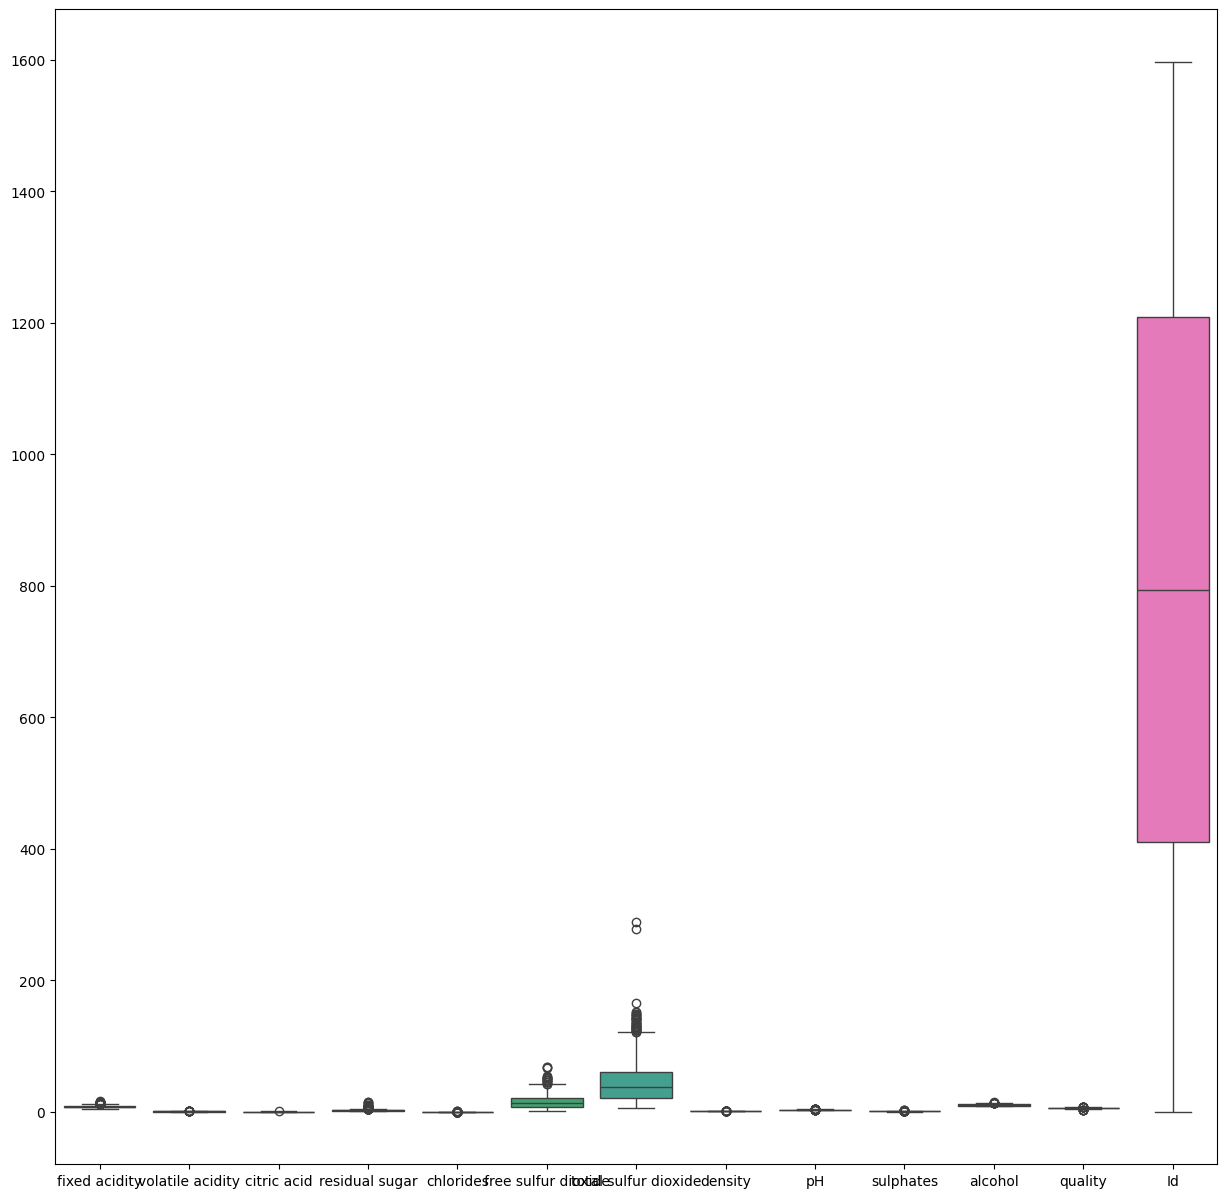

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = df,ax = ax)
plt.show()

# Task
Remove outliers from the dataset `df`.

## Identify outliers

### Subtask:
Identify outliers in the dataset using a suitable method (e.g., Z-score or IQR).


**Reasoning**:
Calculate Q1, Q3, IQR, lower bound, and upper bound for each numerical column to identify outliers using the IQR method.



In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Number of outliers identified:", len(outliers))

Number of outliers identified: 309


## Remove outliers

### Subtask:
Remove the identified outliers from the dataset.


**Reasoning**:
Remove the identified outliers from the dataset by filtering the original DataFrame based on the index of the outliers DataFrame.



In [17]:
df_cleaned = df.drop(outliers.index)
display(df_cleaned.shape)

(834, 13)

## Verify outlier removal

### Subtask:
Verify that the outliers have been removed by visualizing the data again (e.g., using boxplots).


**Reasoning**:
Visualize the cleaned data using boxplots to verify that outliers have been removed.



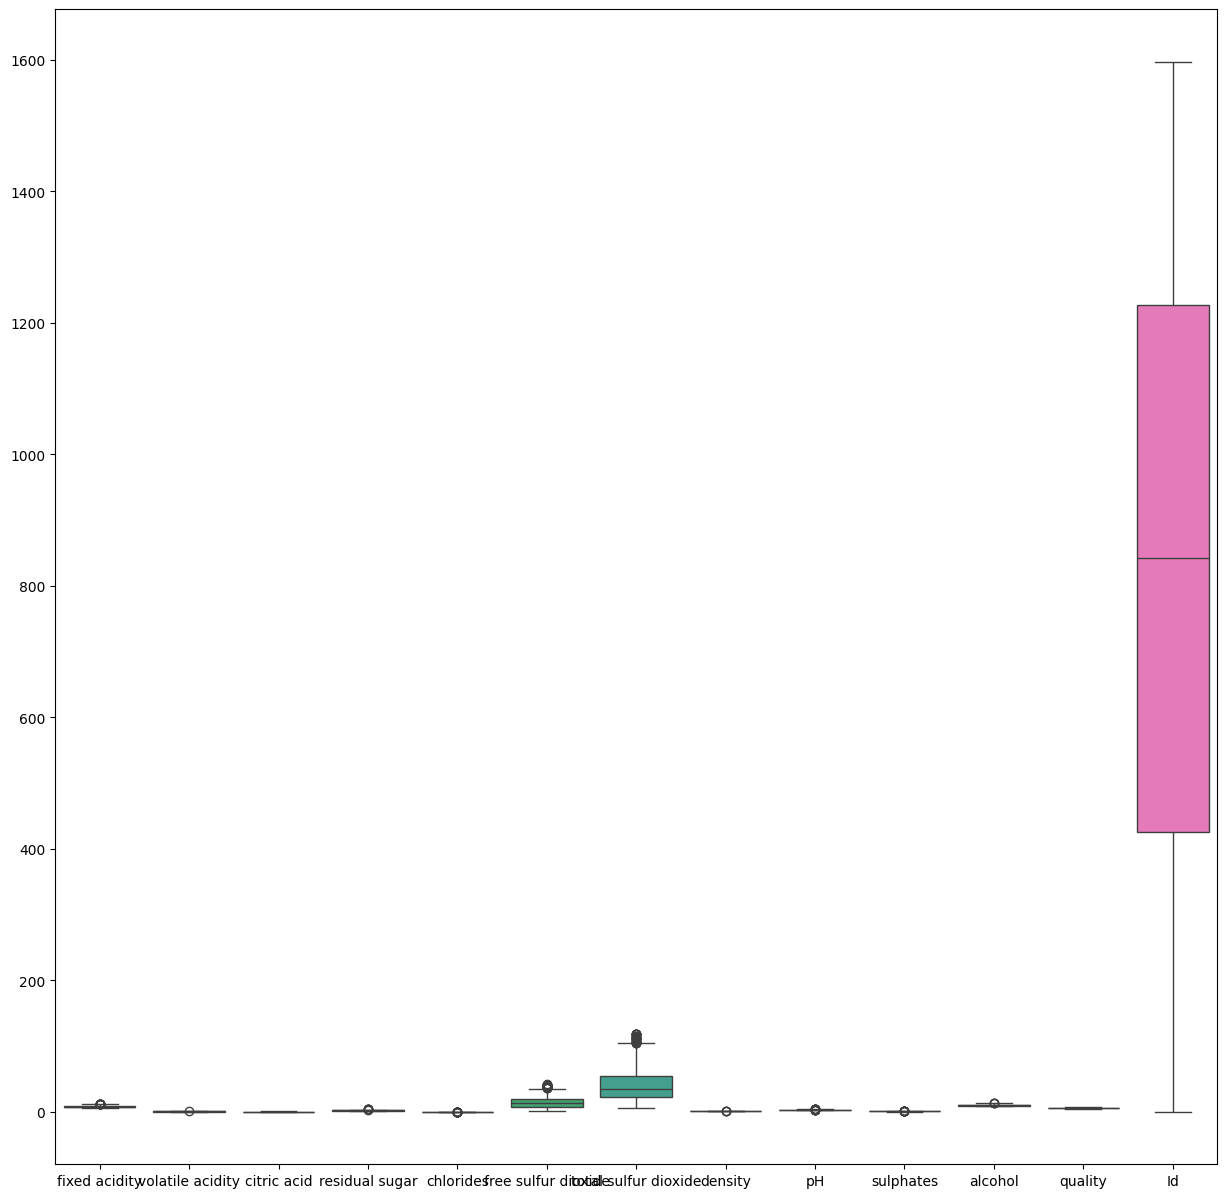

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = df_cleaned,ax = ax)
plt.show()

## Summary:

### Data Analysis Key Findings

*   Using the IQR method, 309 outliers were identified in the original dataset.
*   After removing the identified outliers, the cleaned dataset `df_cleaned` contains 834 rows and 13 columns.

### Insights or Next Steps

*   The process successfully identified and removed outliers based on the IQR method.
*   Visualize the distributions of the cleaned data to confirm the impact of outlier removal and decide if further data transformation is needed.


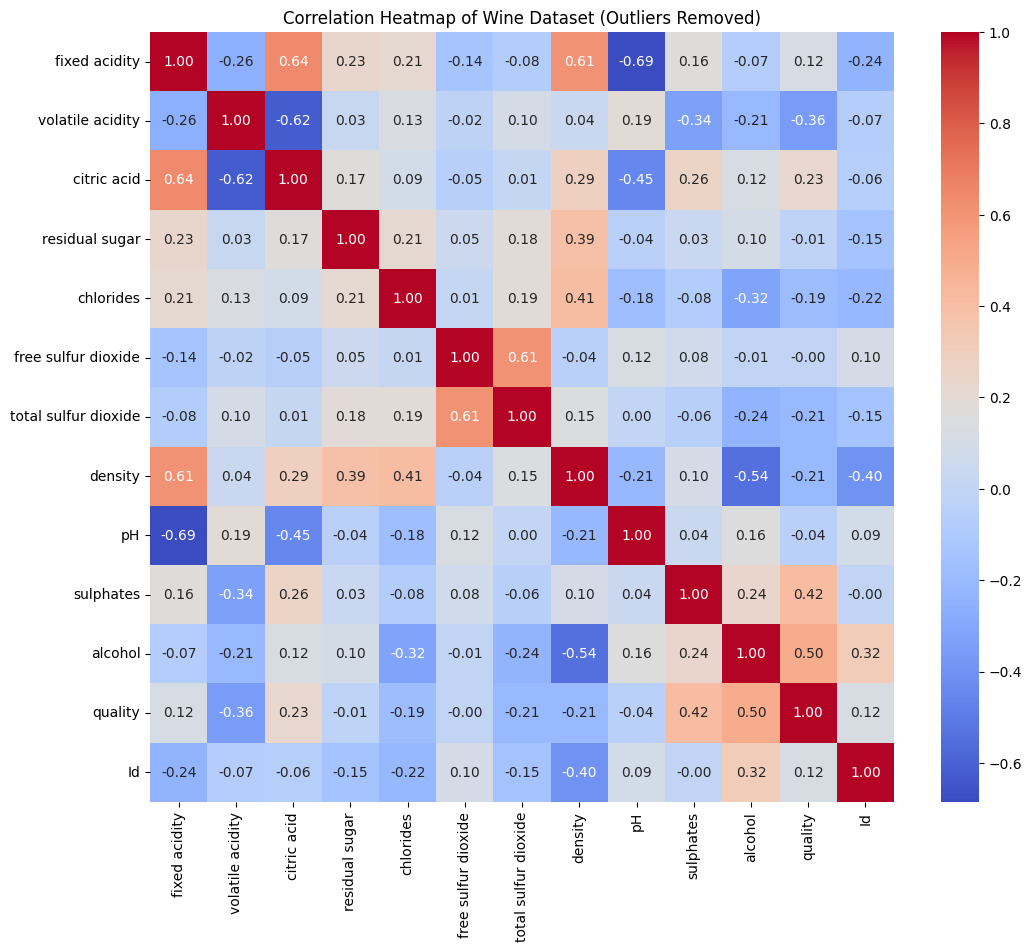

In [19]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Dataset (Outliers Removed)')
plt.show()

# Task
Interpret the correlation heatmap, identify important features, perform feature selection, and build a predictive model.

## Interpret the correlation heatmap

### Subtask:
Analyze the generated heatmap to understand the relationships between features and the target variable (`quality`).


**Reasoning**:
Analyze the correlation heatmap to understand the relationships between features and the target variable 'quality'.



Correlation of features with 'quality':
quality                 1.000000
alcohol                 0.495364
sulphates               0.417164
citric acid             0.228060
Id                      0.120168
fixed acidity           0.117844
free sulfur dioxide    -0.001257
residual sugar         -0.014981
pH                     -0.042515
chlorides              -0.190625
density                -0.208410
total sulfur dioxide   -0.209743
volatile acidity       -0.356948
Name: quality, dtype: float64

Absolute correlation of features with 'quality' (sorted):
quality                 1.000000
alcohol                 0.495364
sulphates               0.417164
volatile acidity        0.356948
citric acid             0.228060
total sulfur dioxide    0.209743
density                 0.208410
chlorides               0.190625
Id                      0.120168
fixed acidity           0.117844
pH                      0.042515
residual sugar          0.014981
free sulfur dioxide     0.001257
Name: quality

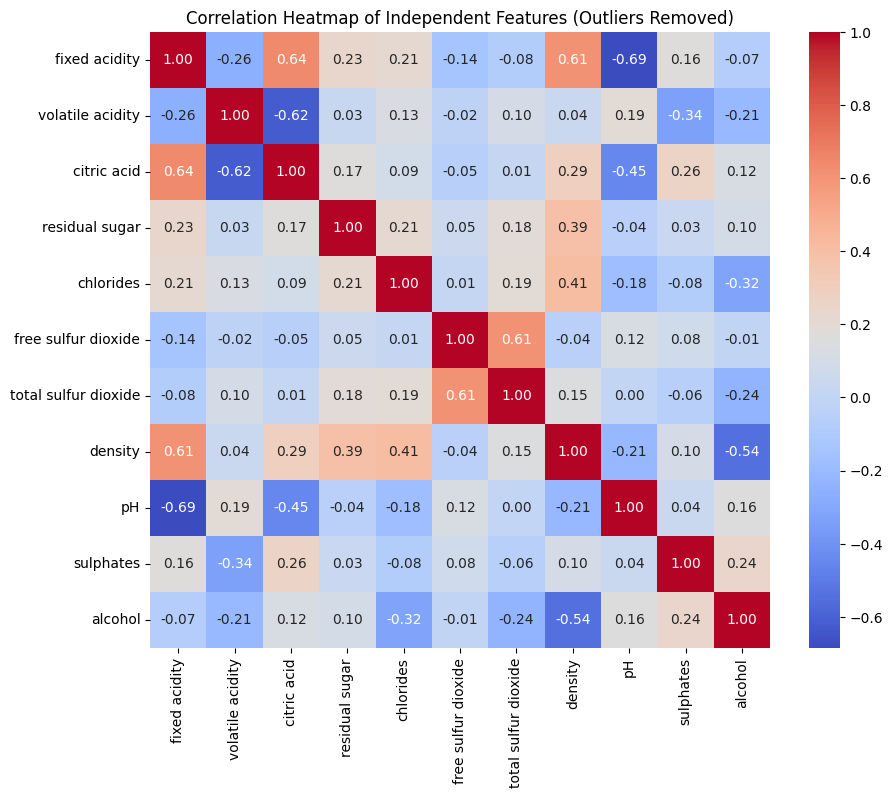

In [20]:
print("Correlation of features with 'quality':")
print(correlation_matrix['quality'].sort_values(ascending=False))

print("\nAbsolute correlation of features with 'quality' (sorted):")
print(correlation_matrix['quality'].abs().sort_values(ascending=False))

print("\nCorrelation matrix (excluding 'quality' and 'Id'):")
independent_correlation = correlation_matrix.drop(['quality', 'Id'], axis=1).drop(['quality', 'Id'], axis=0)
plt.figure(figsize=(10, 8))
sns.heatmap(independent_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Independent Features (Outliers Removed)')
plt.show()

## Identify important features

### Subtask:
Based on the heatmap, identify features that have a significant correlation with the target variable and consider potential multicollinearity.


**Reasoning**:
Based on the previous analysis of the correlation heatmap, list the features that have a significant correlation with 'quality' and note potential multicollinearity issues from the independent feature correlation heatmap. Then, list the features considered important based on these observations.



In [21]:
print("Features with significant correlation (absolute value >= 0.2) with 'quality':")
significant_quality_corr = correlation_matrix['quality'][(correlation_matrix['quality'].abs() >= 0.2)].sort_values(ascending=False)
print(significant_quality_corr)

print("\nPairs of independent features with high correlation (absolute value >= 0.7):")
high_corr_pairs = []
for i in range(len(independent_correlation.columns)):
    for j in range(i + 1, len(independent_correlation.columns)):
        if abs(independent_correlation.iloc[i, j]) >= 0.7:
            high_corr_pairs.append(f"{independent_correlation.columns[i]} and {independent_correlation.columns[j]}: {independent_correlation.iloc[i, j]:.2f}")
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(pair)
else:
    print("No pairs of independent features with absolute correlation >= 0.7 found.")

print("\nImportant features for predicting wine quality:")
# Based on significant correlation with quality and considering multicollinearity
important_features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'chlorides']
print(important_features)

Features with significant correlation (absolute value >= 0.2) with 'quality':
quality                 1.000000
alcohol                 0.495364
sulphates               0.417164
citric acid             0.228060
density                -0.208410
total sulfur dioxide   -0.209743
volatile acidity       -0.356948
Name: quality, dtype: float64

Pairs of independent features with high correlation (absolute value >= 0.7):
No pairs of independent features with absolute correlation >= 0.7 found.

Important features for predicting wine quality:
['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'chlorides']


## Perform feature selection

### Subtask:
Select the features that will be used for building the predictive model.


**Reasoning**:
Create the feature matrix X and the target vector y based on the identified important features.



In [22]:
important_features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'chlorides']
X = df_cleaned[important_features]
y = df_cleaned['quality']

display(X.head())
display(y.head())

,alcohol,sulphates,volatile acidity,citric acid,total sulfur dioxide,density,chlorides
0,9.4,0.56,0.70,0.00,34.0,0.9978,0.076
1,9.8,0.68,0.88,0.00,67.0,0.9968,0.098
2,9.8,0.65,0.76,0.04,54.0,0.9970,0.092
3,9.8,0.58,0.28,0.56,60.0,0.9980,0.075
4,9.4,0.56,0.70,0.00,34.0,0.9978,0.076


,quality
0,5
1,5
2,5
3,6
4,5


## Prepare data for modeling

### Subtask:
Split the cleaned data into training and testing sets and scale the features if necessary.


**Reasoning**:
Split the data into training and testing sets and scale the features.



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5])
display(X_test_scaled[:5])
display(y_train.head())
display(y_test.head())

array([[ 0.80146745,  1.89260131, -0.3752952 ,  0.16685672, -0.15940539,
        -0.89404634, -1.44444694],
       [-0.34183132, -0.53485711, -0.43469764, -0.7217136 ,  0.26712901,
         0.12311905,  0.00590204],
       [ 0.9054037 ,  1.45912659, -0.3752952 ,  0.16685672, -0.54716393,
        -0.90660394, -1.65163966],
       [ 0.17784994, -0.79494194, -0.13768542, -1.2215344 , -0.43083637,
        -0.76847037,  0.35122323],
       [-1.06938508, -0.18807734,  0.90185733, -0.05528586,  1.62428392,
        -0.1280329 ,  2.21595764]])

array([[-0.54970382, -0.79494194,  0.21872924, -0.16635715, -1.28390517,
        -1.27077426, -0.68474033],
       [ 1.63295746, -0.27477228, -1.08812451,  0.50007059, -0.62471564,
        -1.19542868, -0.75380457],
       [ 2.46444748, -0.96833183, -1.02872207, -0.27742844, -0.12062953,
        -0.63033679, -0.27035491],
       [ 1.73689371, -0.01468745,  0.63454634, -0.83278489, -0.62471564,
        -0.76847037,  0.14403052],
       [ 0.6975312 ,  0.41878727, -1.02872207,  0.27792801,  1.15897367,
        -0.0966389 ,  0.55841594]])

,quality
677,6
509,5
657,5
954,6
445,5


,quality
845,6
1130,6
431,6
1098,5
226,5


## Build and train a predictive model

### Subtask:
Choose a suitable classification model (since this is a classification problem) and train it on the training data.


**Reasoning**:
Import the RandomForestClassifier model and train it on the scaled training data.



# Task
Interpret the correlation heatmap, identify important features, perform feature selection, and build a Decision Tree classification model using the cleaned data.

## Build and train a predictive model

### Subtask:
Choose a Decision Tree classification model and train it on the training data.


**Reasoning**:
Import and train a Decision Tree classifier on the scaled training data.



In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained Decision Tree classification model on the testing data using appropriate metrics.


**Reasoning**:
Import necessary metrics, make predictions, and calculate and print evaluation metrics for the Decision Tree model.



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5689
Precision: 0.5617
Recall: 0.5689
F1 Score: 0.5609


## Summary:

### Data Analysis Key Findings
* The Decision Tree classification model achieved an accuracy of 0.5689 on the test data.
* The precision, recall, and F1 score of the model were 0.5617, 0.5689, and 0.5609, respectively, when evaluated using a weighted average.

### Insights or Next Steps
* The current model performance is relatively low, suggesting further optimization or exploration of different model types is needed.
* Consider hyperparameter tuning of the Decision Tree model or exploring other classification algorithms to improve performance.
